In [1]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from plyfile import PlyData, PlyElement

import json
import numpy as np

import pandas as pd

In [2]:
ply = PlyData.read("cuboid.ply")

In [3]:
with open("cube.json") as file:
    verts = np.array(json.load(file))

In [4]:
verts

array([[ 0.76865059, -0.32661888, -2.8902998 ],
       [ 0.74991935, -0.32866985, -3.18994403],
       [ 0.74422234, -0.32662791, -3.00936222],
       ...,
       [-0.61156511,  0.31236774, -3.31158972],
       [-0.61048251,  0.30891114, -3.18879008],
       [-0.60163134,  0.30675074, -2.28502584]])

In [5]:
labels = KMeans(n_clusters=4).fit_predict(verts)

In [6]:
clusters = {
    label: [verts[idx] for idx, lab in enumerate(labels) if lab == label]
    for label in np.unique(labels)
}

In [7]:
df = pd.DataFrame()
df["x"] = verts[:,0]
df["y"] = verts[:,1]
df["z"] = verts[:,2]
df["lab"] = labels

In [8]:
df

x         y         z  lab
0     0.768651 -0.326619 -2.890300    0
1     0.749919 -0.328670 -3.189944    0
2     0.744222 -0.326628 -3.009362    0
3     0.749859 -0.309443 -3.250532    0
4     0.749047 -0.304759 -2.772588    0
...        ...       ...       ...  ...
2354 -0.601907  0.292635 -2.485949    2
2355 -0.608830  0.306265 -3.366592    1
2356 -0.611565  0.312368 -3.311590    1
2357 -0.610483  0.308911 -3.188790    1
2358 -0.601631  0.306751 -2.285026    2

[2359 rows x 4 columns]

In [9]:
print(len(labels))
verts.shape

2359


(2359, 3)

In [10]:
labels

array([0, 0, 0, ..., 1, 1, 2], dtype=int32)

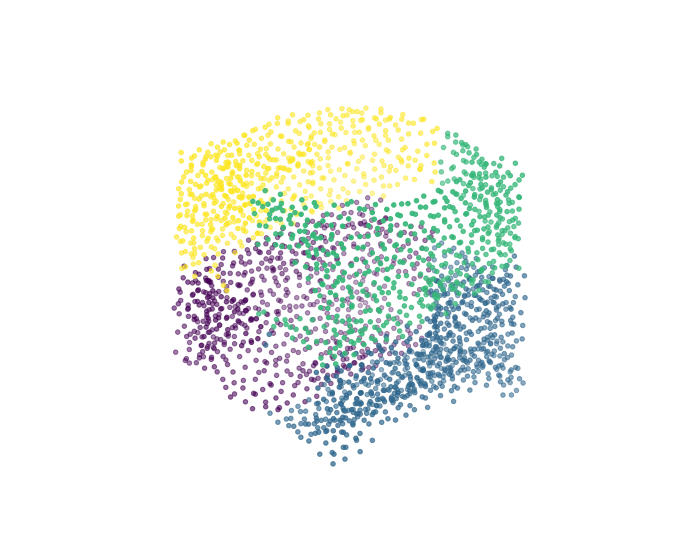

In [11]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_axis_off()
ax.scatter(xs=df["y"],ys=df["x"],zs=df["z"],c=list(labels))
plt.show()

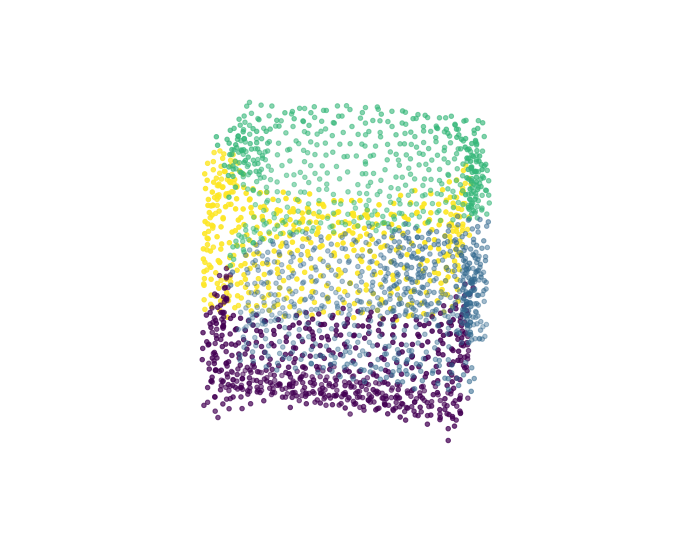

In [12]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_axis_off()
ax.scatter(xs=df["x"],ys=df["y"],zs=df["z"],c=list(labels))
plt.show()

In [13]:
import plotly.express as px
import pandas as pd

In [14]:
labels = KMeans(n_clusters=3).fit_predict(verts)

In [15]:
raw = list(zip(*verts))
data = pd.DataFrame()
data["x"] = raw[0]
data["y"] = raw[1]
data["z"] = raw[2]
data["label"] = labels
data["size"] = [.1 for i in range(len(data))]

In [16]:
import plotly.express as px
fig = px.scatter_3d(data, x='x', y='y', z='z', color='label')
fig.update_yaxes(matches=None, showticklabels=False, visible=False)

In [17]:
class ClusterPoint:
    def __init__(self, primitive:str):
        self.primitive = primitive
        
    def fit(self, vertices):
        self.raw = vertices
        self.data = pd.DataFrame()
        self.data["x"] = list(zip(*self.raw))[0]
        self.data["y"] = list(zip(*self.raw))[1]
        self.data["z"] = list(zip(*self.raw))[2]
        return self
    
    def predict(self, **kwargs):
        return KMeans(**kwargs).fit_predict(self.raw)
    
    def fit_predict(self, vertices, **kwargs):
        self.fit(vertices)
        predict = self.predict(**kwargs)
        self.data["label"] = predict
        fig = px.scatter_3d(self.data, x='x', y='y', z='z', color='label')
        fig.show()
        
        return predict

In [18]:
with open("cube.json") as file:
    verts = json.load(file)

In [19]:
ClusterPoint("cylinder").fit_predict(verts)

array([3, 3, 3, ..., 6, 6, 2], dtype=int32)

In [20]:
from sklearn import datasets

In [21]:
#data = datasets.make_moons()
data = datasets.make_circles()

In [22]:
labels = AffinityPropagation().fit(data[0])
labels = labels.predict(data[0])
labels
#plt.scatter(*zip(*[p for i, p in enumerate(data[0]) if labels[i]==0]))
#plt.scatter(*zip(*[p for i, p in enumerate(data[0]) if labels[i]==1]))

NameError: name 'AffinityPropagation' is not defined

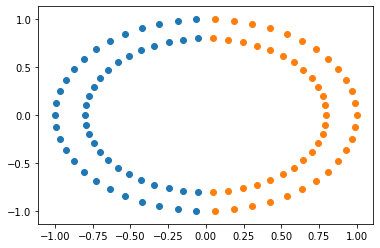

In [23]:
labels = KMeans(n_clusters=2, n_init=1, init=np.array([[-1,0],[1,0]])).fit_predict(data[0])
plt.scatter(*zip(*[p for i, p in enumerate(data[0]) if labels[i]==0]))
plt.scatter(*zip(*[p for i, p in enumerate(data[0]) if labels[i]==1]))